In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
import xgboost
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings 

In [3]:
df = pd.read_csv('cancer.csv')

In [4]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
diagnosis =  df.diagnosis.value_counts(normalize=True)
print(diagnosis)

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64


In [7]:
df.drop("id",axis=1,inplace=True)

In [8]:
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_enconder = label_encoder.fit(y)
y = label_enconder.transform(y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
eval_set=[(X_test, y_test)]
print(X_train.shape, X_test.shape)

(398, 30) (171, 30)


In [ ]:
import xgboost
print("XGBoost version:", xgboost.__version__)

XGBoost version: 1.7.6


In [12]:
import sys
print(sys.executable)

/opt/anaconda3/envs/MITxPRO/bin/python


In [13]:
from xgboost import XGBClassifier

print('Initializing xgboost.sklearn.XGBClassifier and starting training...')

#set "st" to the current datetime
### BEGIN SOLUTION
st = datetime.now()
### END SOLUTION

# Use xgboost.sklearn.XGBClassifier to create a model called "clf" with the following parameters:
#     objective: "binary:logistic"
#     learning_rate: 0.05
#     seed: 9616
#     max_depth: 20
#     gamma: 10
#     n_estimators: 500
### BEGIN SOLUTION
clf = XGBClassifier(
    objective="binary:logistic",
    learning_rate=0.05,
    seed=9616,
    max_depth=20,
    gamma=10,
    n_estimators=500)
### END SOLUTION

# Fit the model with training data. Also use the following parameters:
#     early_stopping_rounds: 20
#     eval_metric: "auc"
#     eval_set: eval_set
#     verbose: False
### BEGIN SOLUTION
clf.fit(X_train, y_train, early_stopping_rounds=20, eval_metric="auc", eval_set=eval_set, verbose=False)
### END SOLUTION


print(datetime.now()-st)

# set "y_pred" to the clf predictions on the test dataset.
### BEGIN SOLUTION
y_pred = clf.predict(X_test)
### END SOLUTION

# Get the accuracy score of the model set the output to "accuracy".
### BEGIN SOLUTION
accuracy = accuracy_score(np.array(y_test).flatten(), y_pred)
### END SOLUTION

print("Accuracy: %.10f%%" % (accuracy * 100.0))

# Get the ROC-AUC score for the model.
### BEGIN SOLUTION
accuracy_per_roc_auc = roc_auc_score(np.array(y_test).flatten(), y_pred)
### END SOLUTION

print("ROC-AUC: %.10f%%" % (accuracy_per_roc_auc * 100))


Initializing xgboost.sklearn.XGBClassifier and starting training...
0:00:00.065294
Accuracy: 95.3216374269%
ROC-AUC: 94.1614420063%


/opt/anaconda3/envs/MITxPRO/lib/python3.12/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/envs/MITxPRO/lib/python3.12/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

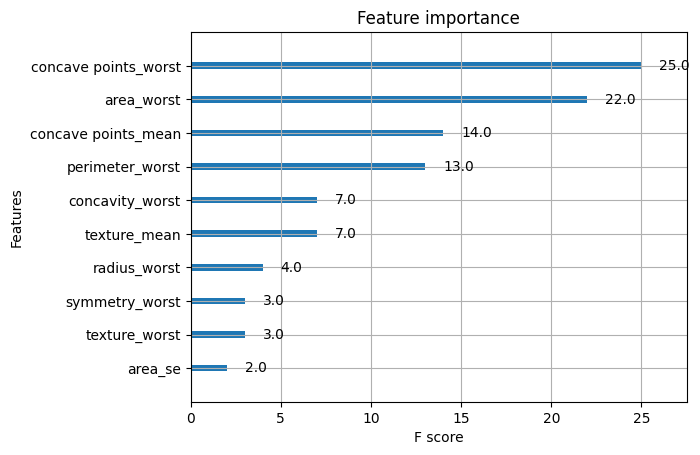

In [15]:
xgboost.plot_importance(clf)